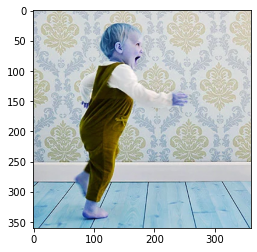

In [4]:
import cv2
import matplotlib.pyplot as plt
# read the image in 
photo=cv2.imread("single.jpg")
#lET US SEE THE SHAPE OF THE IMAGE.
#print(photo.shape)
plt.imshow(photo)

In [5]:
import pandas as pd
import time
import numpy as np    # for mathematical operations
import cv2
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline

from keras.preprocessing import image   # for preprocessing the images

from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

# Specify the paths for the 2 files
protoFile = "openpose-master/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "openpose-master/models/pose/mpi/pose_iter_160000.caffemodel"
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]



# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [6]:
# Read image
frame = cv2.imread("single.jpg")

# Specify the input image dimensions
inWidth = 368
inHeight = 368
threshold = 0.1
 
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]

t = time.time()

# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
 
# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

In [7]:
#prediction
output = net.forward()

In [8]:
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []
for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
 
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H
 
    if prob > threshold :
        cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)




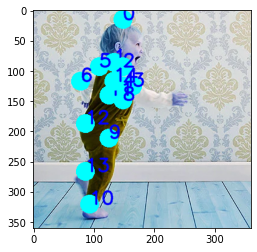

In [9]:
plt.imshow(frame)

In [10]:
for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3, lineType=cv2.LINE_AA)
            cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)



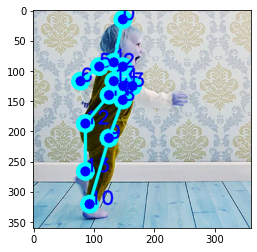

In [12]:
#cv2.putText(frame, "time taken = {:.2f} sec".format(time.time() - t), (50, 50), cv2.FONT_HERSHEY_COMPLEX, .8, (255, 50, 0), 2, lineType=cv2.LINE_AA)
# cv2.putText(frame, "OpenPose using OpenCV", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 50, 0), 2, lineType=cv2.LINE_AA)
plt.imshow(frame)
#
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
cv2.imshow('Output-Keypoints', frame)